# Project: Communicate Data Findings (PISA Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#ena">Explanatory Data Analysis</a></li>
<li><a href="#conc">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this Data Visualization Project we're going to Explore and Explain **PISA Data**

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.


In [4]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# from scipy.stats import pearsonr

#### WARNING : We will not run below cell again as it takes 10-15 minutes to read original dataset. If you're already familiar with data set ; please proceed with Explanatory Analysis where we're using cleaned version of dataset. 

In [ ]:
# error:'utf-8' codec can't decode byte 0x92 in position 35: invalid start byte
# advise for error: https://stackoverflow.com/questions/30462807/encoding-error-in-panda-read-csv
df_pisa = pd.read_csv('pisa2012.csv',encoding ='latin1', low_memory=False)
df_pisadict = pd.read_csv('pisadict2012.csv',encoding ='latin1', low_memory=False)
# warning: ...have mixed types.Specify dtype option on import or set low_memory=False ...
# advise for warning : https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

<a id='eda'></a>
## Exploratory Data Analysis

First we'll explore our data and document findings in a report. We'll introduce the dataset, then systematically walk through the points of exploration 


In [ ]:
df_pisa.head()

In [ ]:
df_pisadict.columns = ['abbreviation', 'meaning']
df_pisadict.head(5)

In [ ]:
df_pisa.info()

In [ ]:
df_pisadict.info()


**We'll focus on questions listed below :**  


- **Question1 :** Distribution of Data Across Countries ? 


- **Question2 :** Distribution of Data Across Gender ?  


- **Question3 :** Distribution of Success in Math, Science and Reading ?


- **Question4 :** Distribution of Success in Math, Science and Reading across Genders


- **Question5 :** Does there exist inequality in academic achievement? For which we'll examine difference in wealth.


- **Question... :** Impact of Teacher Student Relations on success ( then I skipped due to high amount of NaNs ) 


- **Question6 :**  Distribution of Success in Math, Science and Reading across Countries





So some of the descriptive features in our clear dataframe. could be 

- **Descriptive Feature1 :** Achievements 


- **Descriptive Feature2 :** Countries 


- **Descriptive Feature3 :** Gender


- **Descriptive Feature4 :** Wealth 


- **Descriptive Feature5 :** Teacher Student Relations


#### Feature1 : Achievements 
Since most questions are about results, let's start with picking some features whcih are most related with success and achievement :

In [ ]:
# there are many more indicative information on success but we'll focus on the ones below during this project :
results = ['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH',
               'PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE',
               'PV1READ','PV2READ','PV3READ','PV4READ','PV5READ']    

df_pisadict[df_pisadict.abbreviation.isin(results) ]

#### Feature2 : Countries 

Despite the fact that number of countries stated at [the link](http://www.oecd.org/pisa/aboutpisa/pisa-2012-participants.htm) should be 65; our dataset has 68 unique values for 'CNT' attribute. After a quick analysis, I noticed some US states are also listed as countries. We've to consolidate those for a proper analysis.

In [ ]:
df_pisa['CNT'].nunique()

In [ ]:
df_pisa['CNT'].value_counts()

#### Feature3 : Gender

In [ ]:
## it was hard to detect which column was referring to this so maybe we should rename this in our clean dataset
df_pisadict.query('meaning == "Gender"')

In [ ]:
df_pisa['ST04Q01'].value_counts()

#### Feature4 : Wealth

In [ ]:
df_pisadict.query('abbreviation == "WEALTH"')

In [ ]:
## this is a continuous numeric variable , i
df_pisa['WEALTH'].sort_values().head()

In [ ]:
# In addition to using this way, maybe we can also split spread of wealth into categorical variables 
df_pisa['WEALTH'].sort_values(ascending=False).head()

#### Feature5 : Teacher Student Relations

In [ ]:
df_pisa.STUDREL.sort_values().head()

<a id='cleaning'></a>
## Data Cleaning

There are a total of 485490 entries with in dataset and 635 different features (columns ) all explained in dictionary. 

Our original dataset is massive so we need to build a cleaner one. From now on, we'll work from backwards and start from questions to filter most relevant data for our analysis. 


In [ ]:
df_clean = df_pisa[['CNT','ST04Q01','WEALTH','STUDREL','PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH',
               'PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE',
               'PV1READ','PV2READ','PV3READ','PV4READ','PV5READ'] ]

First, let's calculate average scores of all different learning areas

In [ ]:
# correct index?
df_clean.iloc[:,4:9].head()

In [ ]:
math_cols=list(df_clean.iloc[:,4:9].columns)
scie_cols=list(df_clean.iloc[:,9:14].columns)
read_cols=list(df_clean.iloc[:,14:19].columns)
math_cols,scie_cols,read_cols

In [ ]:
#before averages calculated
df_clean.head()

In [ ]:
#prevent warning 
#https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None 

In [ ]:
#calculate mean scores for various verticals :
#sample code df['avg'] = df[['Monday', 'Tuesday']].mean(axis=1)
df_clean['math_score'] = df_clean[math_cols].mean(axis=1).round(2)
df_clean['scie_score'] = df_clean[scie_cols].mean(axis=1).round(2)
df_clean['read_score'] = df_clean[read_cols].mean(axis=1).round(2)

In [ ]:
#let's also include
df_clean['avg_score'] = df_clean[['math_score','scie_score','read_score']].mean(axis=1).round(2)

In [ ]:
#after averages calculated
df_clean.head()

In [ ]:
# Other alternative to calculate mean scores & cross check 
#https://stackoverflow.com/questions/34734940/row-wise-average-for-a-subset-of-columns-with-missing-values 
#df_clean['math_score2'] = df_clean.iloc[:,4:9].mean(axis=1).round(2)
#df_clean['scie_score2'] = df_clean.iloc[:,9:14].mean(axis=1).round(2)
#df_clean['read_score2'] = df_clean.iloc[:,14:19].mean(axis=1).round(2)

In [ ]:
# drop unnecessary columns 
df_clean.drop(results,axis=1,inplace=True)
# rename columns for better understanding
df_clean.rename({'CNT': 'country', 'ST04Q01': 'gender', 'WEALTH': 'wealth','STUDREL':'std_relation'}, axis=1,inplace=True)

In [ ]:
df_clean.head()

In [ ]:
# reduce total number of countries from 38 to 35 
df_clean = df_clean.replace(['Connecticut (USA)', 'Florida (USA)',
                             'Massachusetts (USA)', 'United States of America'],
                            'USA')

In [ ]:
df_clean['country'].value_counts()

In [ ]:
# are there any duplicates ? if so , drop 
df_clean.duplicated().any()

In [ ]:
# are there nulls ? if so, drop 
df_clean.isna().sum()

In [ ]:
# are there nulls ? if so, drop 
df_clean.dropna(subset=['wealth'], inplace=True)

In [ ]:
df_clean.isna().sum()

**Note** It seems there are to many Null values for std_relation and dropping all those might give insufficient information, so we'll leave this part of analysis. 

In [ ]:
# we're doing this, not to lose an important amount of data by removing nuls 
df_clean.drop('std_relation',axis=1,inplace=True)

In [ ]:
df_clean.info()

In addition to using wealth as is, maybe we can also split spread of wealth into categorical variables for further analysis

In [ ]:
df_clean.wealth.min(),df_clean.wealth.max()

In [ ]:
#https://stackoverflow.com/questions/49382207/how-to-map-numeric-data-into-categories-bins-in-pandas-dataframe

bins = [-6.65, -3.25, 0, 3.25]
wealth_ranges = ['Low', 'Medium', 'High']

df_clean['wealth_range'] = pd.cut(df_clean['wealth'], bins, labels=wealth_ranges)

#### a quick view at the latest version of our dataset :

In [6]:
df_clean = pd.read_csv('pisa2012_clean.csv')
df_clean.head(5)

,country,gender,wealth,math_score,scie_score,read_score,avg_score,wealth_range
0,Albania,Female,-2.92,366.19,371.91,261.01,333.04,Medium
1,Albania,Female,0.69,470.56,478.12,384.69,444.46,High
2,Albania,Female,-0.23,505.54,486.61,405.18,465.78,Medium
3,Albania,Female,-1.17,449.45,453.97,477.46,460.29,Medium
4,Albania,Female,-1.17,385.50,367.16,256.01,336.22,Medium


In [ ]:
# save our new & clear data set for future use
df_clean.to_csv('pisa2012_clean.csv',index=False)

<a id='ena'></a>
## Explanatory Data Analysis

As defined at the exploratory analysis, we'll be looking for clarification on questions below : 

- **Question1 :** Distribution of Data Across Countries ? 


- **Question2 :** Distribution of Data Across Gender ?  


- **Question3 :** Distribution of Success in Math, Science and Reading ?


- **Question4 :** Distribution of Success in Math, Science and Reading across Genders


- **Question5 :** Does there exist inequality in academic achievement? For which we'll examine difference in wealth.


- **Question6 :**  Distribution of Success in Math, Science and Reading across Countries


Let's start by importing data from latest csv file we save :

In [8]:
# let's see if it'll work as expected and proceed with Explanatory Analysis if it works,
df = pd.read_csv('pisa2012_clean.csv')

In [3]:
df.head()

,country,gender,wealth,math_score,scie_score,read_score,avg_score,wealth_range
0,Albania,Female,-2.92,366.19,371.91,261.01,333.04,Medium
1,Albania,Female,0.69,470.56,478.12,384.69,444.46,High
2,Albania,Female,-0.23,505.54,486.61,405.18,465.78,Medium
3,Albania,Female,-1.17,449.45,453.97,477.46,460.29,Medium
4,Albania,Female,-1.17,385.50,367.16,256.01,336.22,Medium


### Question1 : Data Distribution Across Countries

Let's proceed with examining how the data is distributed across countries
 
 - Which countries have provided most # of samples to the dataset ?
 - Which countries have provided least # of samples to the dataset ? 


In [11]:
base_color = sb.color_palette()[0]
type_counts = df.country.value_counts()
type_order= type_counts.index
total = df.shape[0]

Text(0.5, 1.0, 'Distribution of Dataset Across Countries ')

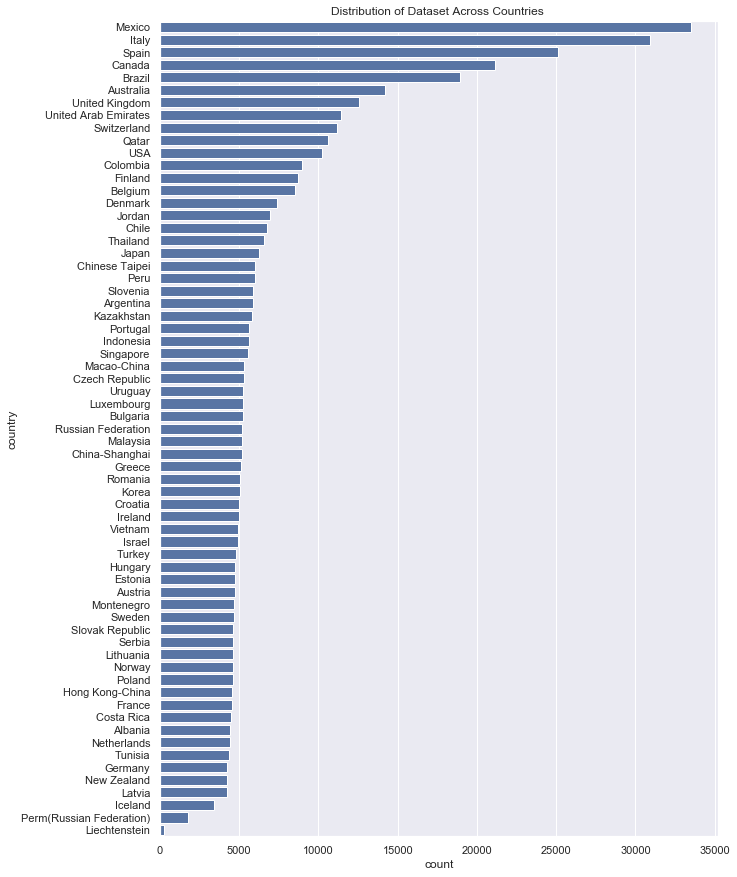

In [12]:
# absolute
plt.figure(figsize = [10, 15])
sb.countplot(data=df, y='country', color=base_color , order=type_order);
plt.title('Distribution of Dataset Across Countries ')

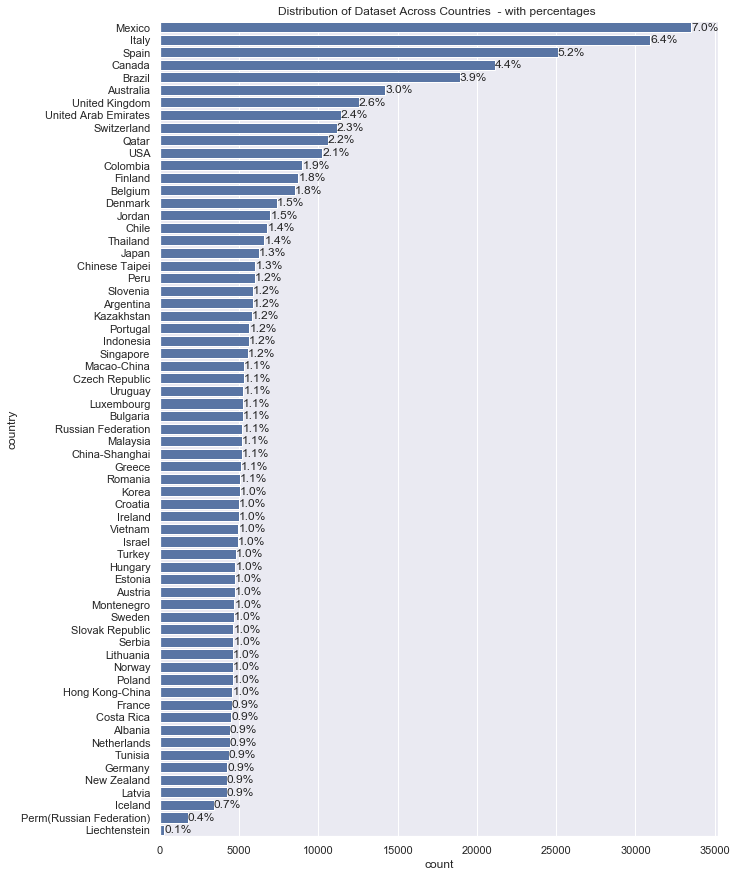

In [15]:
plt.figure(figsize = [10, 15])
#  relative
sb.countplot(data=df, y='country', color=base_color , order=type_order);
plt.title('Distribution of Dataset Across Countries  - with percentages ')
# loop through each pair of locations and labels
for i in range(type_counts.shape[0]):
    # get the text property for the label to get the correct count
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/total)
    # print the annotation just below the top of the bar
    plt.text(count+1, i , pct_string, va = 'center')

**Outcome:** Most of the students are from coming from Mexico(7% of overall), Italy(6.4% of overall) and Spain (5.2% of overall) respectively. On the other hand Iceland(0.7% of overall), Russia(0.4% of overall) and Liechtenstein (0.1% of overall) are the countries with least amount of participation.

### Question2 : Data Distribution Across Genders

Let's proceed with examining how the dataset is distributed across genders

 - Do we have equal number of data from each gender or not ? 

In [16]:
type_counts = df.gender.value_counts()
type_order= type_counts.index
total = df.shape[0]

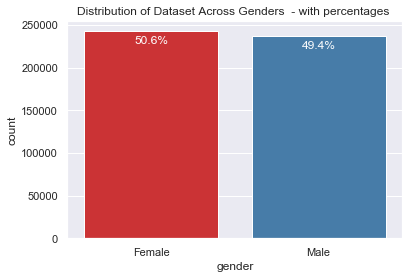

In [18]:
#https://seaborn.pydata.org/generated/seaborn.countplot.html
sb.set(style="darkgrid")
# create the plot
sb.countplot(data = df, x = 'gender', palette="Set1")
plt.title('Distribution of Dataset Across Genders  - with percentages ')

# add annotations
gender_counts = df['gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = gender_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/total)

    # print the annotation just below the top of the bar
    plt.text(loc, count-15000, pct_string, ha = 'center', color = 'w')

**Outcome:** Data has been spreaded across genders almost evenly; 50.6% of overall participants are Female whereas remaining are 49.4% are Male

### Question 3: Distribution of Success in Math, Science and Reading

- What is the score vast majority of students achieved for each class ? 
- What is the lowest and highest scores observed in data set ? 


In [19]:
high_scores=(df['math_score'].max(),df['scie_score'].max(),df['read_score'].max())
high_scores

(903.11, 857.83, 849.36)

In [20]:
#lets pick 900 as the highest score 
bins = np.arange(0,900+1,100)
bins

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

Below comes something i tried;  only to understand how this visualisation will works  :

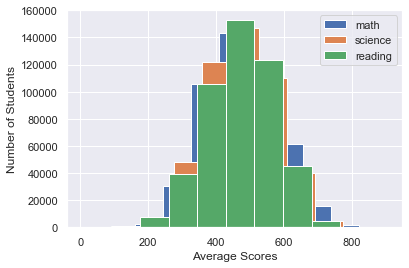

In [21]:
# understanding data & first try ... 
plt.hist(data=df , x='math_score')
plt.hist(data=df , x='scie_score')
plt.hist(data=df , x='read_score')
plt.legend(['math','science','reading'])
plt.xlabel('Average Scores');
plt.ylabel('Number of Students');

As i've mentioned this was only for test and doesn't give us much clarification. But at least we've an understanding about how average scores are distributed for each classes. It's not same for all, but seem to be close. Now let's dive deeper into this to define differences : 


#### Let's use a defined function with docstrings : 

In [41]:
def display_histogram(dataframe, column_name, lecture_name,palette_num=0):
    '''
    INPUT - df - pandas dataframe to be analysed & visualized
            column_name - string - the name of the column you would like to know about
            lecture_name - string - the name of the lecture : mathematics, science or reading ? 
            palette_num - int - to change color code for visual 
            
    OUTPUT -
            graph - an histogram visualizing the distribution of results on selected lecture
    '''
    plt.hist(data=dataframe , x=column_name, bins=bins,color=sb.color_palette()[palette_num]);
    plt.xticks(bins)
    plt.xlabel(f'{lecture_name} Scores');
    plt.ylabel('Number of Students')
    plt.title(f"Average Plausible values in {lecture_name}", fontsize=16);
    plt.legend([lecture_name])

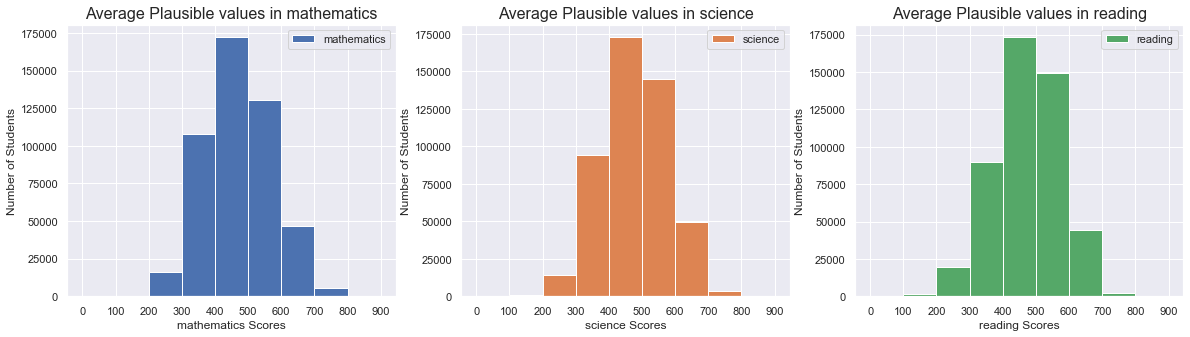

In [45]:
plt.figure(figsize = [20, 5])

# histogram on left: 
plt.subplot(1, 3, 1)
display_histogram(df,'math_score','mathematics')

# histogram on middle: 
plt.subplot(1, 3, 2)
display_histogram(df,'scie_score','science',1)

# histogram on right
plt.subplot(1, 3, 3)
display_histogram(df,'read_score','reading',2)

#### What would the code look like with out using the function ? 

We're also using this for cross-check; outputs should be same

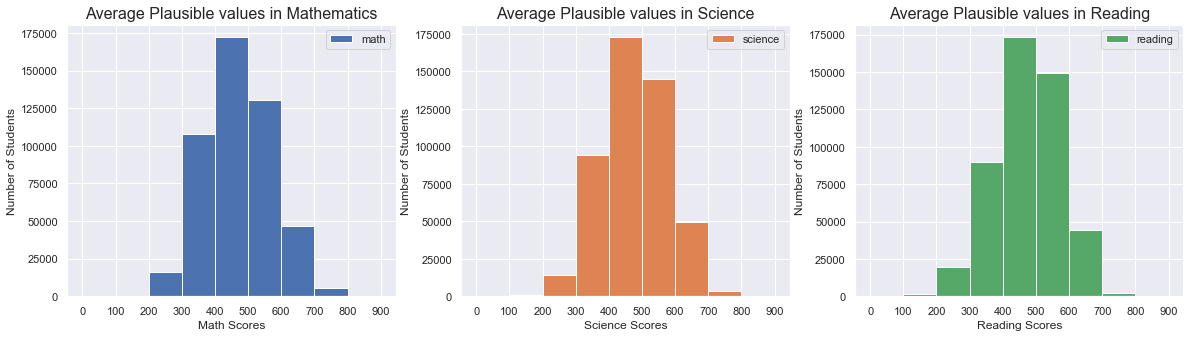

In [46]:

plt.figure(figsize = [20, 5])

# histogram on left: 
plt.subplot(1, 3, 1)
plt.hist(data=df , x='math_score',bins=bins,color=sb.color_palette()[0]);
plt.xticks(bins)
plt.xlabel('Math Scores');
plt.ylabel('Number of Students')
plt.title("Average Plausible values in Mathematics", fontsize=16);
plt.legend(['math'])

# histogram on middle: 
plt.subplot(1, 3, 2)
plt.hist(data=df , x='scie_score',bins=bins,color=sb.color_palette()[1]);
plt.xticks(bins)
plt.xlabel('Science Scores');
plt.ylabel('Number of Students')
plt.title("Average Plausible values in Science", fontsize=16);
plt.legend(['science'])

# histogram on right
plt.subplot(1, 3, 3)
plt.hist(data=df , x='read_score',bins=bins,color=sb.color_palette()[2]);
plt.xticks(bins)
plt.xlabel('Reading Scores');
plt.ylabel('Number of Students')
plt.title("Average Plausible values in Reading", fontsize=16);
plt.legend(['reading']);

**Outcome:** This is much clearer now. For all subjects, most frequest score achieved is between range 400 and 500.Most number of highest scores (between range 700-800 for all subjects) seem to be from Math category whereas we observe the least scores on Reading category (between range 100-200 )

### Question4: Distribution of Success in Math, Science and Reading across Genders

- What about distribution of those results for different genders ? 
- Which gender is more successful in Math, Science and Reading ? 


#### Alternative 1

In [47]:
df_genders=df.groupby(['gender']).mean()[['math_score','scie_score','read_score']]
df_temp=df_genders.reset_index()
df_temp

,gender,math_score,scie_score,read_score
0,Female,464.646888,476.021997,490.480679
1,Male,476.391610,477.409787,455.179795


In [48]:
df_temp.query('gender=="Male"').sum()

gender           Male
math_score    476.392
scie_score     477.41
read_score     455.18
dtype: object

In [49]:
df_temp.query('gender=="Female"').sum()

gender         Female
math_score    464.647
scie_score    476.022
read_score    490.481
dtype: object

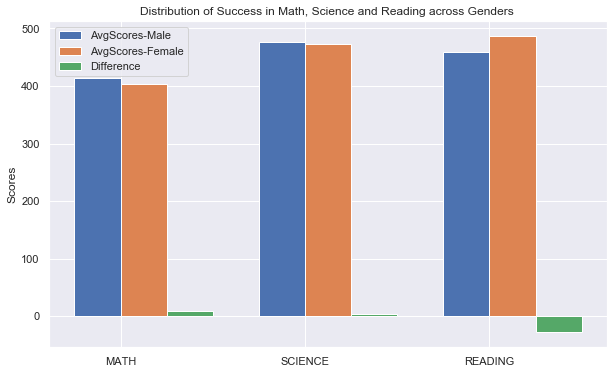

In [52]:
# https://benalexkeen.com/bar-charts-in-matplotlib/
plt.figure(figsize = [10, 6])
N = 3
male_means = (414, 477, 459)
female_means = (404, 473, 487 )
diff_means= (10,4,-28)

ind = np.arange(N) 
width = 0.25       
plt.bar(ind, male_means, width, label='Male')
plt.bar(ind + width, female_means, width,label='Female')
plt.bar(ind + 2*width, diff_means, width,label='Diff')

plt.ylabel('Scores')
plt.title('Distribution of Success in Math, Science and Reading across Genders ')

plt.xticks(ind + width / 2, ('MATH', 'SCIENCE', 'READING'))
plt.legend(['AvgScores-Male','AvgScores-Female','Difference'],loc='best')
plt.savefig('success_femaleVSmale.png')
#plt.show()

**Outcome** Data suggests that Male students are better at Math and Science compared to their Female classmates whereas Femalse students are much better at Reading.

#### Alternative 2

And then I noticed there's an easier way to visualize this: 

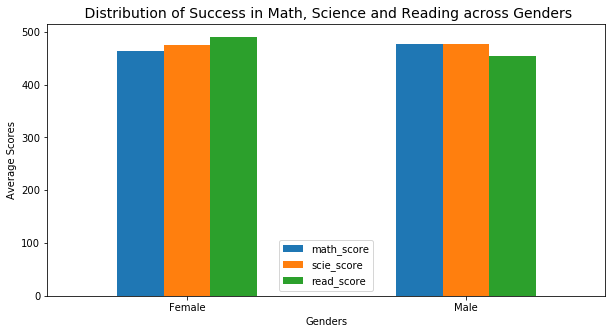

In [9]:
df_genders=df.groupby(['gender']).mean()[['math_score','scie_score','read_score']]
df_genders.plot.bar(figsize=(10,5));
plt.title(' Distribution of Success in Math, Science and Reading across Genders',fontsize=14)
plt.xlabel('Genders');
plt.xticks(rotation=0)
plt.ylabel('Average Scores');

**Outcome** Data suggests that Male students are better at Math and Science compared to their Female classmates whereas Femalse students are much better at Reading.

### Question5 :Does there exist inequality in academic achievement? 

 - Distribution of those results for varying wealth-classes ( high,low,medium ) 
 
 - Correlation between wealth and average scores  
 
#### Distribution of those results for varying wealth-classes ( high,low,medium ) 
 
So we'll examine difference in wealth. Let's see this on pandas first, average scores of each class for each category of wealth 

In [11]:
df_wealth=df.groupby(['wealth_range']).mean()[['math_score','scie_score','read_score']]
df_wealth

,math_score,scie_score,read_score
wealth_range,,,
High,494.413818,499.727844,494.205983
Low,376.138883,386.491346,385.232807
Medium,457.159503,463.928017,461.414316


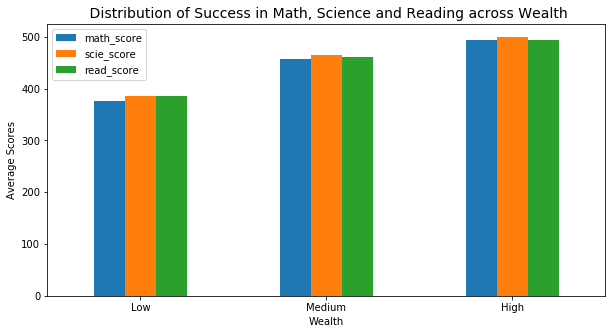

In [12]:
# now let's visualize this 
df_wealth.reindex(["Low", "Medium", "High"]).plot.bar(figsize=(10,5));
plt.title(' Distribution of Success in Math, Science and Reading across Wealth',fontsize=14)
plt.xlabel('Wealth');
plt.xticks(rotation=0)
plt.ylabel('Average Scores');

In [56]:
df.head()

,country,gender,wealth,math_score,scie_score,read_score,avg_score,wealth_range
0,Albania,Female,-2.92,366.19,371.91,261.01,333.04,Medium
1,Albania,Female,0.69,470.56,478.12,384.69,444.46,High
2,Albania,Female,-0.23,505.54,486.61,405.18,465.78,Medium
3,Albania,Female,-1.17,449.45,453.97,477.46,460.29,Medium
4,Albania,Female,-1.17,385.50,367.16,256.01,336.22,Medium


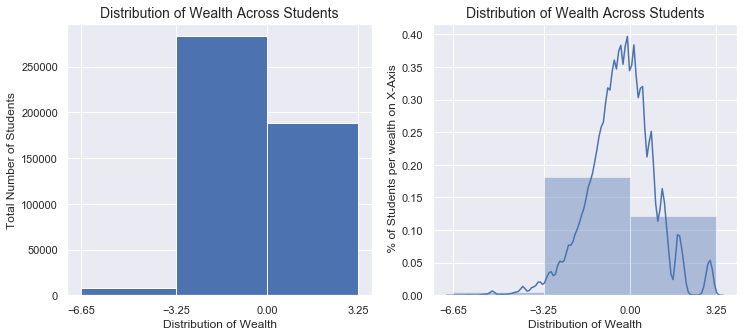

In [58]:
bins = [-6.65, -3.25, 0, 3.25]
plt.figure(figsize = [12, 5])
# histogram on left: 
plt.subplot(1, 2, 1)
plt.hist(data=df , x='wealth',bins=bins);
plt.xticks(bins)
plt.xlabel('Distribution of Wealth');
plt.ylabel('Total Number of Students')
plt.title("Distribution of Wealth Across Students", fontsize=14);

# distplot on right: 
plt.subplot(1, 2, 2)
sb.distplot(df['wealth'],bins=bins)
plt.xticks(bins)
plt.xlabel('Distribution of Wealth');
plt.ylabel(' % of Students per wealth on X-Axis')
plt.title("Distribution of Wealth Across Students", fontsize=14);

**Outcome** Although it was expected, there's a sharp increase in scores as the wealth goes up. Vast majority of students belong to "medium" category in terms of wealth. Despite overplotting caused by too many data points, regression line is also proving that there's a positive correlation between wealth and academic achievement.

####  Correlation between wealth and average scores  

Let's also try to examine same distribution, without classifying wealth into categories. 

In [59]:
df.head()

,country,gender,wealth,math_score,scie_score,read_score,avg_score,wealth_range
0,Albania,Female,-2.92,366.19,371.91,261.01,333.04,Medium
1,Albania,Female,0.69,470.56,478.12,384.69,444.46,High
2,Albania,Female,-0.23,505.54,486.61,405.18,465.78,Medium
3,Albania,Female,-1.17,449.45,453.97,477.46,460.29,Medium
4,Albania,Female,-1.17,385.50,367.16,256.01,336.22,Medium


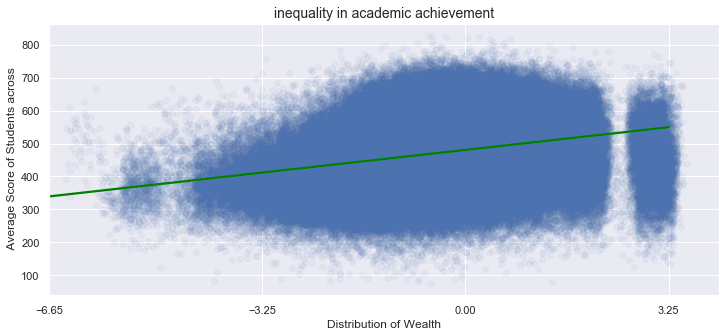

In [61]:
plt.figure(figsize = [12, 5])
sb.regplot(data=df, x='wealth', y='avg_score',x_jitter=0.3, scatter_kws={'alpha':1/20},line_kws={"color": "green"})
plt.xticks(bins)
plt.xlabel('Distribution of Wealth');
plt.ylabel(' Average Score of Students across')
plt.title("inequality in academic achievement", fontsize=14);
plt.savefig('wealthVsuccess.png')

**Outcome:** Despite overplotting(very large number of points to plot or our numeric variables), we're able to observe the positive correlation between average performance across different areas (math,science,reading) and wealth. This in deed might be an indication of inequality in academic achievement

### Question6 :  Distribution of Success in Math, Science and Reading across Countries

  - Most and least successful countries in Math, Science or Reading ? 
  
  - Pick 3 countries focus and analyse differences in detail 

In [62]:
df.head()

,country,gender,wealth,math_score,scie_score,read_score,avg_score,wealth_range
0,Albania,Female,-2.92,366.19,371.91,261.01,333.04,Medium
1,Albania,Female,0.69,470.56,478.12,384.69,444.46,High
2,Albania,Female,-0.23,505.54,486.61,405.18,465.78,Medium
3,Albania,Female,-1.17,449.45,453.97,477.46,460.29,Medium
4,Albania,Female,-1.17,385.50,367.16,256.01,336.22,Medium


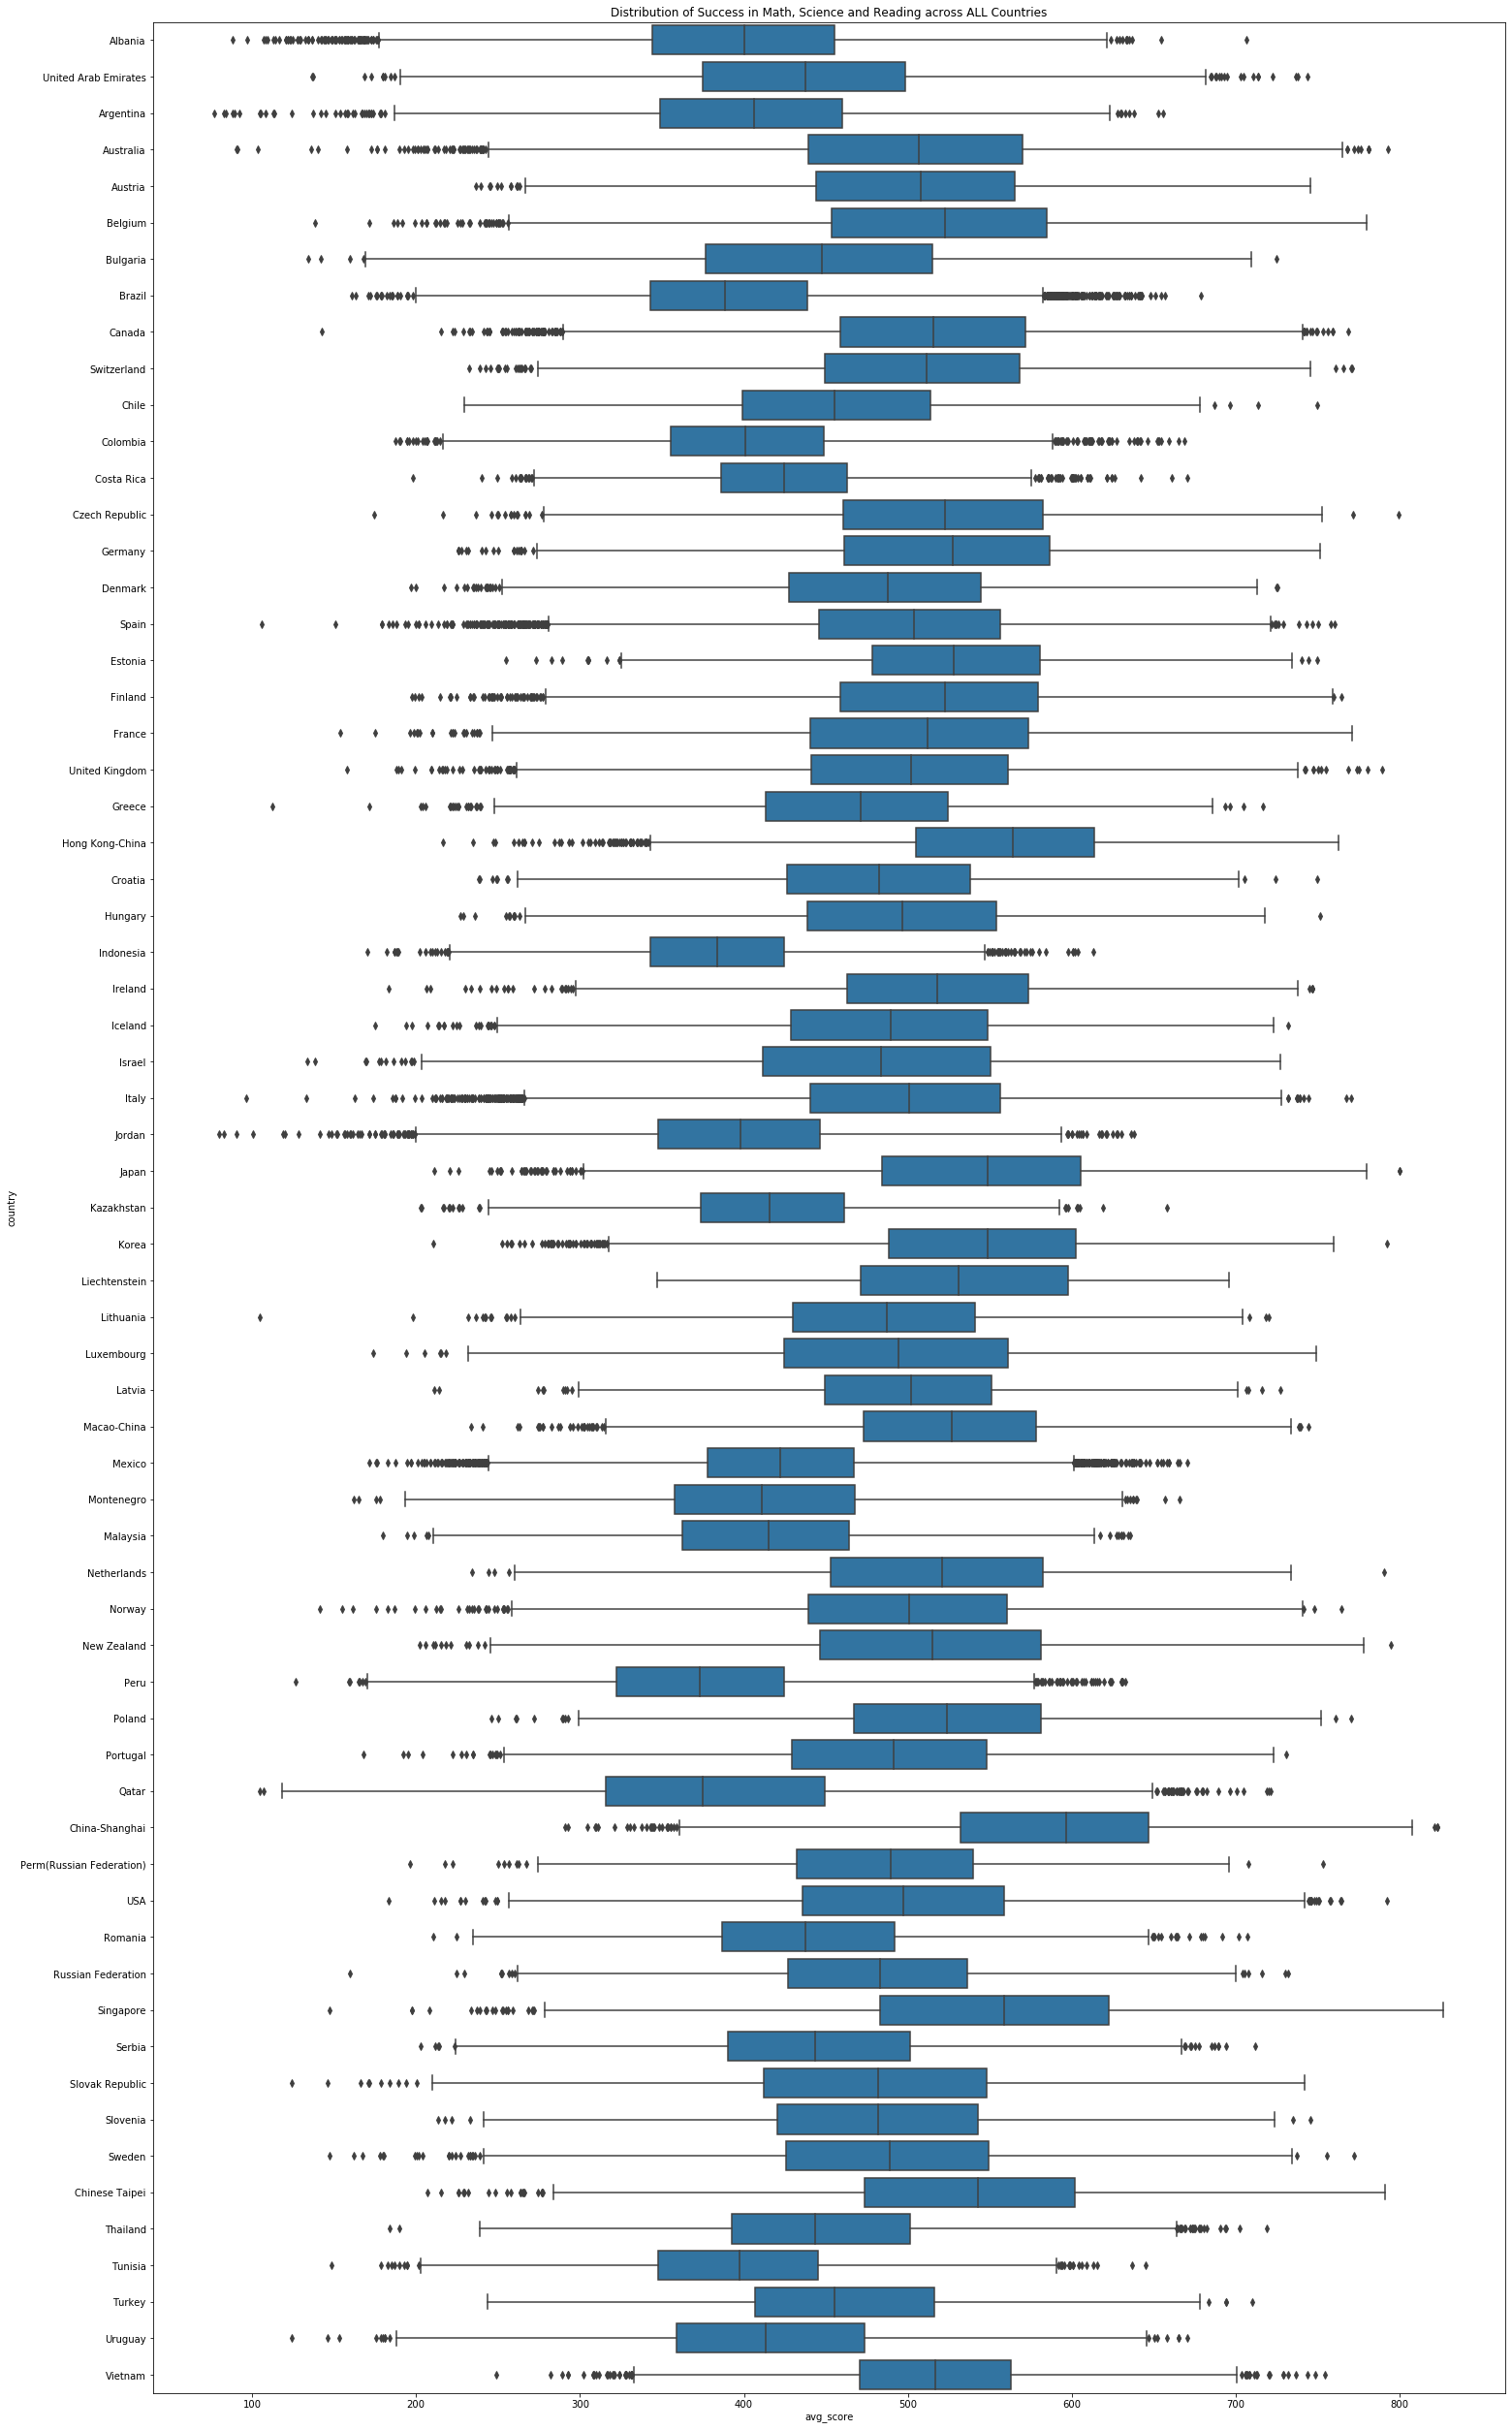

In [13]:
plt.figure(figsize = [25, 45])
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'avg_score', y = 'country',color = base_color)
plt.title('Distribution of Success in Math, Science and Reading across ALL Countries');

Yes, This figure gives an idea to compare math performance across various countries. But it's to intense and for deeper analysis and out of curiosity, I'd like to compare my home country (TR), country of residence(NLD) and USA. 


In [15]:
# focus countries are TR, NLD and USA
df_focus_countries = df.query('country in ["Turkey","Netherlands","USA"]')

In [16]:
# how many students are there from each of those countries in our data set ? 
df_focus_countries.country.value_counts()

USA            10233
Turkey          4815
Netherlands     4401
Name: country, dtype: int64

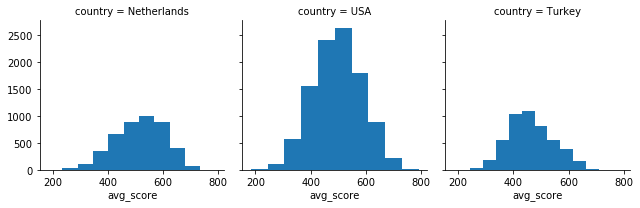

In [17]:
# to better understand data , let's also check how average score is distributed for each country 
g= sb.FacetGrid(data=df_focus_countries, col='country')
g.map(plt.hist,'avg_score');

Above we can see the distribution of average scores in each country which also give an estimation about total number of students. But this was only for understanding our dataset better, now let's dive into details with comparisons : 


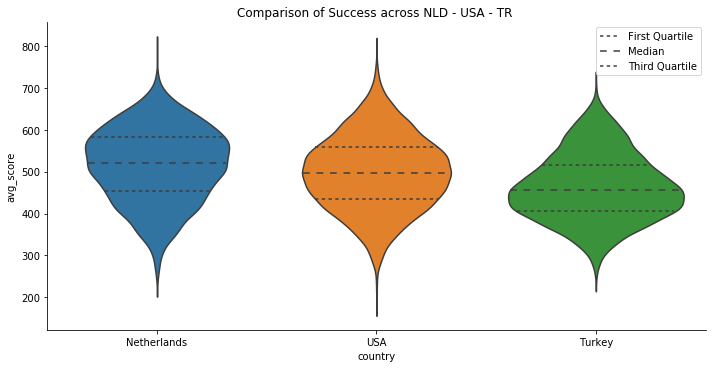

In [18]:
#https://seaborn.pydata.org/generated/seaborn.violinplot.html 
#https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib
g = sb.catplot(x="country",y="avg_score",
                data=df_focus_countries, kind="violin", split=True,inner='quartile',
                height=5, aspect=2,legend=False);
plt.legend(['First Quartile','Median','Third Quartile'])
plt.title('Comparison of Success across NLD - USA - TR ');
plt.savefig('NLDvsUSAvsTR.png') ; 

**Outcome** This one suggests in terms of avg_scores Netherlands comes first whereas Turkey is the last. What if we ask the same question for each class seperately ( math, science and reading ) 

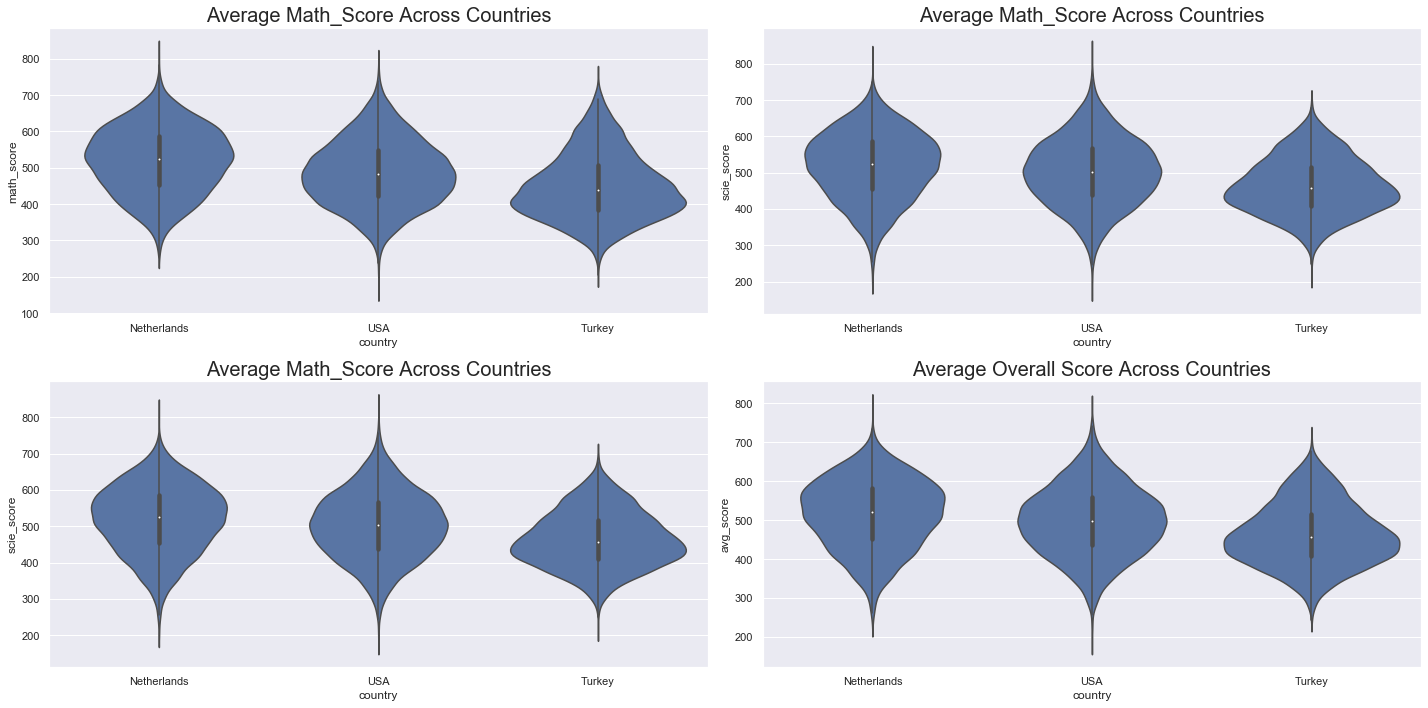

In [69]:
# https://stackoverflow.com/questions/56788245/is-there-a-restriction-on-catplot-with-subplot
fig = plt.figure(figsize = [20, 10])

ax1 = fig.add_subplot(221)
ax1.set_title("Average Math_Score Across Countries",fontsize=20)
g = sb.violinplot(data = df_focus_countries, x = 'country', y = 'math_score',color = base_color,ax=ax1)

ax2 = fig.add_subplot(222)
ax2.set_title("Average Math_Score Across Countries",fontsize=20)
g = sb.violinplot(data = df_focus_countries, x = 'country', y = 'scie_score',color = base_color,ax=ax2)

ax3 = fig.add_subplot(223)
ax3.set_title("Average Math_Score Across Countries",fontsize=20)
g = sb.violinplot(data = df_focus_countries, x = 'country', y = 'scie_score',color = base_color,ax=ax3)

ax4 = fig.add_subplot(224)
ax4.set_title("Average Overall Score Across Countries",fontsize=20)
g = sb.violinplot(data = df_focus_countries, x = 'country', y = 'avg_score',color = base_color,ax=ax4)

plt.close(2)
plt.close(3)
plt.tight_layout()


**Outcome** We can easily compare average success in math, science and reading across all countries. In our detailed analysis for Netherlands, USA and Turkey; data suggests that in all of those categories students from Netherlands have the highest average whereas the ones from Turkey has the least.

<a id='conc'></a>
## Conclusions 

- **Question1 :** Distribution of Data Across Countries ? 

Most of the students are from coming from Mexico(7% of overall), Italy(6.4% of overall) and Spain (5.2% of overall) respectively. 
On the other hand Iceland(0.7% of overall), Russia(0.4% of overall) and Liechtenstein (0.1% of overall) are the countries with least amount of participation.

- **Question2 :** Distribution of Data Across Gender ?  

Data has been spreaded across genders almost evenly; 50.6% of overall participants are Female whereas remaining are 49.4% are Male


- **Question3 :** Distribution of Success in Math, Science and Reading ?

For all subjects, most frequest score achieved is between range 400 and 500.Most number of highest scores (between range 700-800 for all subjects) seem to be from Math category whereas we observe the least scores on Reading category (between range 100-200 )




- **Question4 :** Distribution of Success in Math, Science and Reading across Genders

Data suggests that Male students are better at Math and Science compared to their Female classmates whereas Femalse students are much better at Reading. 

- **Question5 :** Does there exist inequality in academic achievement? For which we'll examine difference in wealth.

Although it was expected, there's a sharp increase in scores as the wealth goes up. Vast majority of students belong to "medium" category in terms of wealth. Despite overplotting caused by too many data points, regression line is also proving that there's a positive correlation between wealth and academic achievement.

- **Question6 :**  Distribution of Success in Math, Science and Reading across Countries

We can easily compare average success in math, science and reading across all countries. In our detailed analysis for Netherlands, USA and Turkey; data suggests that in all of those categories students from Netherlands have the highest average whereas the ones from Turkey has the least. 

### For Slide Mode 
```bash 
jupyter nbconvert "Communicate Data Findings-SlideDeck.ipynb" --to slides --template output-toggle.tpl --post serve
```